<a href="https://colab.research.google.com/github/miacatharina/mimic-code/blob/main/Selected_estimators_evaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install econml[dowhy]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 80.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 567.6/567.6 KB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 KB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.3/287.3 KB 31.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
%pip install dowhy

# Setup 

In [139]:
import pandas as pd
import os, warnings, random
import warnings
import econml 
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from econml.dml import DML, LinearDML, SparseLinearDML, CausalForestDML
import numpy as np
from itertools import product
from sklearn.linear_model import (Lasso, LassoCV, LogisticRegression,
                                  LogisticRegressionCV,LinearRegression,
                                  MultiTaskElasticNet,MultiTaskElasticNetCV)
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from econml.score import RScorer
from econml.metalearners import TLearner, SLearner, XLearner, DomainAdaptationLearner
from econml.dml import CausalForestDML, LinearDML, NonParamDML
from econml.dr import DRLearner, ForestDRLearner, LinearDRLearner
from joblib import Parallel, delayed
from econml.metalearners import TLearner, SLearner, XLearner
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.base import clone
import logging
import sys
from econml.dml import DML, LinearDML,SparseLinearDML,CausalForestDML, NonParamDML, KernelDML
from matplotlib import pyplot as plt
import copy
from econml.sklearn_extensions.model_selection import GridSearchCVList
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import dowhy
from dowhy import CausalModel
from sklearn.linear_model import LassoCV, LogisticRegressionCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from econml.sklearn_extensions.linear_model import WeightedLassoCV, WeightedLasso
from econml.cate_interpreter import SingleTreeCateInterpreter
import shap
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import tensorflow as tf
import timeit
from sklearn.model_selection import train_test_split
from econml.cate_interpreter import SingleTreePolicyInterpreter



def seed_everything(seed=123):
    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    tf.random.set_seed(seed)

seed = 123
seed_everything(seed)

In [ ]:
!pip install dowhy==0.7

In [6]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
#Check the version of TensorFlow you are using
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
2.099751685000001
GPU (s):
0.0923577790000536
GPU speedup over CPU: 22x
Found GPU at: /device:GPU:0
2.11.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Your runtime has 27.3 gigabytes of available RAM

You are using a high-RAM runtime!


# Import the data 

In [279]:
XTY = pd.read_csv("/content/XTY.csv")
X = pd.read_csv("/content/X.csv")
Y = pd.read_csv("/content/Y.csv")
T = pd.read_csv("/content/T.csv")
XTY_train = pd.read_csv("/content/XTY_train.csv")
XTY_test = pd.read_csv("/content/XTY_test.csv")
X_train = pd.read_csv("/content/X_train.csv")
X_test = pd.read_csv("/content/X_test.csv")
Y_train = pd.read_csv("/content/Y_train.csv")
Y_test = pd.read_csv("/content/Y_test.csv")
T_train = pd.read_csv("/content/T_train.csv")
T_test = pd.read_csv("/content/T_test.csv")

XTY.set_index("stay_id", inplace=True)
X.set_index("stay_id", inplace=True)
Y.set_index("stay_id", inplace=True)
T.set_index("stay_id", inplace=True)
XTY_train.set_index("stay_id", inplace=True)
XTY_test.set_index("stay_id", inplace=True)
X_train.set_index("stay_id", inplace=True)
X_test.set_index("stay_id", inplace=True)
Y_train.set_index("stay_id", inplace=True)
Y_test.set_index("stay_id", inplace=True)
T_train.set_index("stay_id", inplace=True)
T_test.set_index("stay_id", inplace=True)

T_train = T_train.iloc[:, 0].to_numpy()
T_test = T_test.iloc[:, 0].to_numpy()
X1_train = X_train.iloc[:, 3:4]
X1_test = X_test.iloc[:, 3:4]
XT = pd.concat([X, pd.DataFrame(T, columns=['treated'])], axis=1)
XT_train = pd.concat([X_train, pd.DataFrame(T_train, columns=['treated'])], axis=1)
XT_test = pd.concat([X_test, pd.DataFrame(T_test, columns=['treated'])], axis=1)

#(1) Binary outcome: Hypokalemia within 48 hours 
Y1A = Y.iloc[:, 2].to_numpy()
Y1A_train = Y_train.iloc[:, 2].to_numpy()
Y1A_test = Y_test.iloc[:, 2].to_numpy()

#(1)Continuous outcome: Minimum serum potassium within 48 hours 
Y1B = Y.iloc[:, 0].to_numpy()
Y1B_train = Y_train.iloc[:, 0].to_numpy()
Y1B_test = Y_test.iloc[:, 0].to_numpy()

#(1)Continuous outcome: Maximum serum potassium within 48 hours 
Y1C = Y.iloc[:, 5].to_numpy()
Y1C_train = Y_train.iloc[:, 5].to_numpy()
Y1C_test = Y_test.iloc[:, 5].to_numpy()

#(2)Binary outcome: AKI within 48 hours 
Y2 = Y.iloc[:, [38]].astype(int) 
Y2= Y2.to_numpy()
Y2_train = Y_train.iloc[:, 38].astype(int) 
Y2_train = Y2_train.to_numpy()
Y2_test = Y_test.iloc[:, 38].astype(int)
Y2_test = Y2_test.to_numpy()

In [ ]:
print(Y1B)

# Set up Grid search baseline

In [ ]:
class GridSearchCVList:

    def __init__(self, estimator_list, param_grid_list, scoring=None,
                 n_jobs=None, iid='warn', refit=True, cv='warn', verbose=0, pre_dispatch='2*n_jobs',
                 error_score='raise', return_train_score=False):
        self._gcv_list = [GridSearchCV(estimator, param_grid, scoring=scoring,
                                       n_jobs=n_jobs, refit=refit, cv=cv, verbose=verbose,
                                       pre_dispatch=pre_dispatch, error_score=error_score,
                                       return_train_score=return_train_score)
                          for estimator, param_grid in zip(estimator_list, param_grid_list)]
        return

    def fit(self, X, y, sample_weight = None, **fit_params):
        self.best_ind_ = np.argmax([gcv.fit(X, y, sample_weight = sample_weight, **fit_params).best_score_ for gcv in self._gcv_list])
        self.best_estimator_ = self._gcv_list[self.best_ind_].best_estimator_
        self.best_score_ = self._gcv_list[self.best_ind_].best_score_
        self.best_params_ = self._gcv_list[self.best_ind_].best_params_
        return self

    def predict(self, X):
        return self.best_estimator_.predict(X)

    def predict_proba(self, X):
        return self.best_estimator_.predict_proba(X)
  
#Cross-validated nuisance and final stage models
def first_stage_reg():
    return GridSearchCVList([Lasso(random_state=123),
                             RandomForestRegressor(n_estimators=100, random_state=123),
                             GradientBoostingRegressor(random_state=123)],
                             param_grid_list=[{'alpha': [.001, .01, .1, 1, 10]},
                                               {'max_depth': [3, None],
                                               'min_samples_leaf': [10, 50]},
                                              {'n_estimators': [50, 100],
                                               'max_depth': [3],
                                               'min_samples_leaf': [10, 30]}],
                             cv=5,
                             scoring='neg_mean_squared_error')

def first_stage_clf():
    return GridSearchCVList([LogisticRegression(random_state=123),
                             RandomForestClassifier(n_estimators=100, random_state=123),
                             GradientBoostingClassifier(random_state=123)],
                             param_grid_list=[{'C': [0.01, .1, 1, 10, 100]},
                                              {'max_depth': [3, 5],
                                               'min_samples_leaf': [10, 50]},
                                              {'n_estimators': [50, 100],
                                               'max_depth': [3],
                                               'min_samples_leaf': [10, 30]}],
                             cv=5,
                             scoring='neg_mean_squared_error')

def final_stage():
    return GridSearchCVList([WeightedLasso(random_state=123),
                             RandomForestRegressor(n_estimators=100, random_state=123)],
                             param_grid_list=[{'alpha': [.001, .01, .1, 1, 10]},
                                              {'max_depth': [3, 5],
                                               'min_samples_leaf': [10, 50]}],
                             cv=5,
                             scoring='neg_mean_squared_error')

In [ ]:
model_yb = clone(first_stage_reg().fit(X, Y1B).best_estimator_)

In [ ]:
print(model_yb)

RandomForestRegressor(min_samples_leaf=10, random_state=123)


In [ ]:
model_ytb = clone(first_stage_reg().fit(XT, Y1B).best_estimator_)
print(model_ytb)

# Data transformation

In [331]:
min_max = pd.read_csv("/content/min_max.csv", usecols= ["column_name","min_value", "max_value"]).reset_index(drop=True)
print(min_max.head())

                 column_name  min_value   max_value
0               sequence_icu        1.0   12.000000
1              sequence_hadm        1.0   69.000000
2                     amount        0.0  200.000003
3  diff_starttime_intime_day        0.0    8.000000
4  diff_intime_admittime_day       -1.0  121.000000


## Unscale variables

In [333]:
def unscale_value(df, column_name, scaled_value):
    row = df[df['column_name'] == column_name]
    min_value = row['min_value'].values[0]
    max_value = row['max_value'].values[0]

    original_value = scaled_value * (max_value - min_value) + min_value
    return original_value

In [340]:
scaled = 0.13339465
original = unscale_value(min_max, 'weight', scaled_age)
print(f"Original value: {original}")

Original value: 64.22145


##Scale variables 

In [349]:
def scale_value(df, column_name, original_value):
    row = df[df['column_name'] == column_name]
    min_value = row['min_value'].values[0]
    max_value = row['max_value'].values[0]

    scaled_value = (original_value - min_value) / (max_value - min_value)
    return scaled_value

original = 1  # Example original age value
scaled = scale_value(min_max, 'weight', original)
print(f"Scaled value: {scaled}")

Scaled value: -0.11247443762781185


## Transform the ATE from scaled variable 

In [382]:
def interpret_ate(variable_name, ATE, X, min_max):
    # Find the min_value and max_value for the given variable_name
    min_value = min_max.loc[min_max['column_name'] == variable_name, 'min_value'].values[0]
    max_value = min_max.loc[min_max['column_name'] == variable_name, 'max_value'].values[0]

    # Compute variable_difference
    variable_difference = max_value - min_value

    # Compute scaled_variable_difference and ATE_for_X_units
    scaled_variable_difference = 1 / variable_difference
    ATE_for_X_units = scaled_variable_difference * ATE * X
    return ATE_for_X_units

In [384]:
variable_name = 'age'
ATE = 0.14611012
X = 10

# Call the function
ATE_for_X_units = interpret_ate(variable_name, ATE, X, min_max)
print(f"ATE for {X} units of {variable_name}: {ATE_for_X_units}")

ATE for 10 units of age: 0.020015084931506853




*   The ATE measures the average difference in the outcome when the feature is changed by one unit 








# (A) Potassium as outcome


## Best nuisance models

In [190]:
#Binary outcomes: Best estimators for propensity model and outcome model
model_ya = LogisticRegression(C=100, random_state=123, n_jobs=1)
model_ta = GradientBoostingClassifier(min_samples_leaf=10, n_estimators=50,
                           random_state=123)
model_yta = LogisticRegression(C=100, random_state=123, n_jobs=1)

In [191]:
#Continuous outcomes: Best estimators for propensity model and outcome model
model_yb = RandomForestRegressor(min_samples_leaf=10, random_state=123, n_jobs=1)
model_tb = GradientBoostingClassifier(min_samples_leaf=10, n_estimators=50,
                           random_state=123)
model_ytb = RandomForestRegressor(min_samples_leaf=10, random_state=123, n_jobs=1)

# (A) Binary outcomes

## 1. Time: 0-48

### 1.1 Hypokalemia 


In [192]:
W_columns = ['sequence_icu', 'sequence_hadm', 'diff_intime_admittime_day', 'male', 'age', 'weight', 'admission_type_emergency', 'adm_med', 'adm_surg', 'careunit_MICU/SICU', 'careunit_CVICU', 'careunit_TSICU', 'careunit_CCU', 
                    'bun', 'cl', 'crea_pre', 'glu', 'mg', 'k_pre', 'na', 'plt', 'urine', 'o2sat', 'resp', 'hr', 'map', 'temp','antiplatelet','beta_agonist', 'beta_blocker', 'cort', 'dex',
                     'furosemide', 'h2_antagonist', 'heparinoid', 'ins', 'k_supp', 'lax', 'nsaid','vaso_ind', 'coag', 'copd', 'depress', 'dm', 'hypothy', 'liver', 'htn', 'valve', 'mech_vent_invasive','supp_o2']

In [193]:
XTY = pd.read_csv("/content/XTY.csv")
XTY_train = pd.read_csv("/content/XTY_train.csv")
XTY_test = pd.read_csv("/content/XTY_test.csv")

#(1.2) Build a model
Y_train = XTY_train["0_48_hypokalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [145]:
columns = XTY_train.columns.to_list()
print(columns)

['stay_id', 'treated', 'amount', 'diff_starttime_intime_day', '0_48_min_k', '0_48_hour_min_k', '0_48_hypokalemia', '0_48_severe_hypokalemia', '0_48_max_k', '0_48_hour_max_k', '0_48_hyperkalemia', '0_48_mean_k', '0_24_min_k', '0_24_hour_min_k', '0_24_hypokalemia', '0_24_severe_hypokalemia', '0_24_max_k', '0_24_hour_max_k', '0_24_hyperkalemia', '0_24_mean_k', '0_12_min_k', '0_12_hour_min_k', '0_12_hypokalemia', '0_12_severe_hypokalemia', '0_12_max_k', '0_12_hour_max_k', '0_12_hyperkalemia', '0_12_mean_k', '0_6_min_k', '0_6_hour_min_k', '0_6_hypokalemia', '0_6_severe_hypokalemia', '0_6_max_k', '0_6_hour_max_k', '0_6_hyperkalemia', '0_6_mean_k', '0_3_min_k', '0_3_hour_min_k', '0_3_hypokalemia', '0_3_severe_hypokalemia', '0_3_max_k', '0_3_hour_max_k', '0_3_hyperkalemia', '0_3_mean_k', '0_2_min_k', '0_2_hour_min_k', '0_2_hypokalemia', '0_2_severe_hypokalemia', '0_2_max_k', '0_2_hour_max_k', '0_2_hyperkalemia', '0_2_mean_k', '0_1_min_k', '0_1_hour_min_k', '0_1_hypokalemia', '0_1_severe_hypoka

In [146]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.003       0.036 0.081  0.936        -0.056         0.062
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.022          -0.029           0.044
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.042         -0.061          0.074
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [195]:
print(X_train.shape)

(4042, 50)


#### ATE by feature 

In [196]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)

In [198]:
#ATE by feature 
ATE_by_feature = []

for i in range(X_train.shape[1]):
    # Create the current feature (T) and confounders (W) matrices
    X_train_T = X_train[:, i].reshape(-1, 1)
    X_train_W = np.delete(X_train, i, axis=1)
    X_test_T = X_test[:, i].reshape(-1, 1)
    X_test_W = np.delete(X_test, i, axis=1)
    
    # Fit the ForestDRLearner using the current feature and confounders
    forestdrl.fit(Y_train, T_train, X=X_train_T, W=X_train_W)
    
    # Calculate the ATE for the current feature
    ATE = forestdrl.ate(X_test_T)
    
    # Store the ATE value
    ATE_by_feature.append(ATE)

ATE_by_feature = np.array(ATE_by_feature)

In [199]:
print(ATE_by_feature)

[ 0.00043965  0.00096132  0.00184331 -0.0004292   0.00209246  0.00254934
  0.00240997  0.00250666  0.0021607   0.00229856  0.00218642  0.00235977
  0.00500377  0.00329357  0.00034013  0.0043735  -0.00175845  0.00268922
  0.00371198  0.00310968  0.0069036   0.00304375  0.0032202  -0.00068028
  0.00344092  0.00153002  0.00239831  0.00162347  0.00501885  0.00230628
  0.00343858  0.00192157  0.00116867  0.00221873  0.00197959  0.00358122
  0.00542835  0.00225831  0.00270631  0.0022641   0.00225117  0.00119546
  0.00091969  0.00175051  0.00208152  0.00272285  0.0022549   0.00207898
  0.002102    0.00260053]


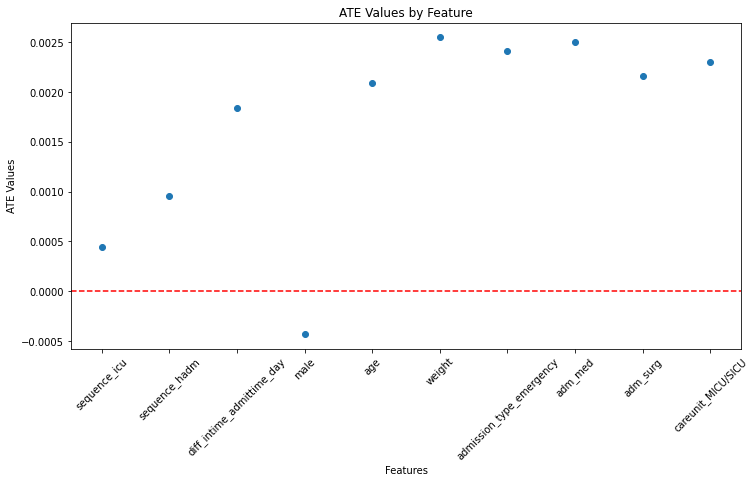

In [303]:
ATE_by_feature_10 = [0.00043965, 0.00096132, 0.00184331, -0.0004292, 0.00209246, 0.00254934,
  0.00240997, 0.00250666, 0.0021607, 0.00229856]

W_columns_10 = ['sequence_icu', 'sequence_hadm', 'diff_intime_admittime_day', 'male', 'age', 
             'weight', 'admission_type_emergency', 'adm_med', 'adm_surg', 'careunit_MICU/SICU']

plt.figure(figsize=(12, 6))
plt.plot(W_columns_10, ATE_by_feature_10, 'o')
plt.xlabel("Features")
plt.ylabel("ATE Values")
plt.title("ATE Values by Feature")
plt.xticks(rotation=45)
plt.axhline(y=0, linestyle='--', color='red')  # Add a dashed horizontal line at y=0
plt.show()

#### Tree interpreter 

In [91]:
from IPython.display import display

In [147]:
#Interpret the outcome 
intrp = SingleTreeCateInterpreter(include_model_uncertainty=False, max_depth=3, min_samples_leaf=10)

In [148]:
# We interpret the CATE model's behavior based on the features used for heterogeneity
intrp.interpret(forestdrl, X_test)
#Render the tree
intrp.render(out_file ="tree_interpeter",feature_names=W_columns, rotate=True)
# Plot the tree
intrp.plot(fontsize=8, feature_names=W_columns, rounded = True)

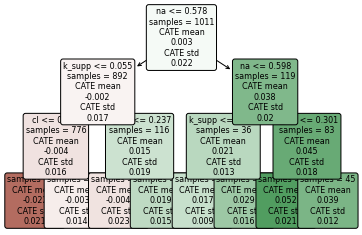

In [109]:
plt.show()
display(plt.gcf())

In [149]:
# We find a tree-based treatment policy based on the CATE model
# sample_treatment_costs is the cost of treatment. Policy will treat if effect is above this cost.
intrp = SingleTreePolicyInterpreter(risk_level=None, max_depth=2, min_samples_leaf=1,min_impurity_decrease=.001)
intrp.interpret(forestdrl, X_test)

In [150]:
intrp.render(out_file ="tree_0_48_hypokalemia",feature_names=W_columns, rotate=True)

### 1.2 Severe hypokalemia

In [61]:
#(1.2) Build a model
Y_train = XTY_train["0_48_severe_hypokalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [62]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.001       0.013 0.111  0.912         -0.02         0.023
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.011          -0.027           0.015
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.017         -0.028          0.025
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 1.3 Hyperkalemia

In [151]:
# Build a model
Y_train = XTY_train["0_48_hyperkalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [152]:
print(XTY_train.shape)

(4042, 199)


In [153]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.016       0.025 0.661  0.509        -0.025         0.057
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.034          -0.005           0.111
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.043          -0.02          0.107
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [155]:
#Interpret the outcome 
intrp = SingleTreeCateInterpreter(include_model_uncertainty=False, max_depth=3, min_samples_leaf=10)
# We interpret the CATE model's behavior based on the features used for heterogeneity
intrp.interpret(forestdrl, X_test)
#Render the tree
intrp.render(out_file ="tree_0_48_hyperkalemia",feature_names=W_columns, rotate=True)
# Plot the tree
intrp.plot(fontsize=8, feature_names=W_columns, rounded = True)

In [154]:
# We find a tree-based treatment policy based on the CATE model
# sample_treatment_costs is the cost of treatment. Policy will treat if effect is above this cost.
intrp = SingleTreePolicyInterpreter(risk_level=None, max_depth=2, min_samples_leaf=1,min_impurity_decrease=.001)
intrp.interpret(forestdrl, X_test)
intrp.render(out_file ="tree2_0_48_hyperkalemia",feature_names=W_columns, rotate=True)

## 2. Time: 0-24

### 2.1 Hypokalemia

In [231]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_24_min_k"].notnull()]

In [232]:
print(XTY.shape)

(4638, 151)


In [81]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [82]:
print(XTY_train.shape)

(3710, 151)


In [83]:
#Build a model
Y_train = XTY_train["0_24_hypokalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [84]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.003       0.036 -0.087  0.931        -0.062         0.055
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.019          -0.041           0.023
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.041          -0.07          0.057
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 21. Severe hypokalemia

In [85]:
#Build a model
Y_train = XTY_train["0_24_severe_hypokalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [86]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.004       0.012 0.341  0.733        -0.015         0.024
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.005          -0.002           0.011
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.013         -0.014          0.024
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 2.3 Hyperkalemia

In [87]:
#Build a model
Y_train = XTY_train["0_24_hyperkalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [88]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.005       0.017 0.287  0.774        -0.023         0.033
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
     0.01          -0.007           0.022
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
        0.02         -0.021          0.037
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 3. Time: 0-12 

### 3.1 Hypokalemia

In [229]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_12_min_k"].notnull()]

In [230]:
print(XTY.shape)

(3211, 151)


In [90]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [91]:
print(XTY_train.shape)

(2568, 151)


In [92]:
#Build a model
Y_train = XTY_train["0_12_hypokalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [93]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.006       0.035 -0.163   0.87        -0.063         0.052
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.017          -0.032           0.027
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.039         -0.064          0.061
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 3.2 Severe hypokalemia

In [94]:
#Build a model
Y_train = XTY_train["0_12_severe_hypokalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [95]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.003       0.011 -0.252  0.801        -0.021         0.015
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.006          -0.012           0.006
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.012         -0.022          0.016
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 3.3 Hyperkalemia

In [96]:
#Build a model
Y_train = XTY_train["0_12_hyperkalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [97]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.016        0.02 0.782  0.434        -0.018         0.049
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.023          -0.003           0.066
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.031         -0.014          0.074
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 4. Time: 0-6

### 4.1 Hypokalemia 

In [227]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_6_min_k"].notnull()]

In [228]:
print(XTY.shape)

(1897, 151)


In [99]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [100]:
print(XTY_train.shape)

(1517, 151)


In [101]:
#Build a model
Y_train = XTY_train["0_6_hypokalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [102]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.002       0.041 0.052  0.958        -0.065         0.069
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.038          -0.029           0.085
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.055          -0.06          0.098
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 4.2 Severe hypokalemia 

In [103]:
#Build a model
Y_train = XTY_train["0_6_severe_hypokalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [104]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.009       0.017 -0.543  0.587        -0.037         0.019
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
     0.01          -0.027           0.005
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
        0.02         -0.044          0.018
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 4.3 Hyperkalemia

In [105]:
#Build a model
Y_train = XTY_train["0_6_hyperkalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [106]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.015       0.029 0.517  0.605        -0.033         0.063
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.033          -0.003           0.041
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.044         -0.023          0.064
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 5. Time: 0-3

### 5.1 Hypokalemia 

In [10]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_3_min_k"].notnull()]

In [11]:
print(XTY.shape)

(1173, 167)


In [12]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [15]:
#Build a model
Y_train = XTY_train["0_3_hypokalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [16]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.065        0.07 -0.921  0.357         -0.18         0.051
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.035          -0.145          -0.024
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.079         -0.202          0.054
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 5.2 Severe hypokalemia 

In [18]:
#Build a model
Y_train = XTY_train["0_3_severe_hypokalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [19]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.023       0.038 -0.594  0.552        -0.085          0.04
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.022          -0.063           0.004
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.044         -0.104          0.032
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 5.3 Hyperkalemia

In [20]:
#Build a model
Y_train = XTY_train["0_3_hyperkalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [21]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.041       0.047 0.856  0.392        -0.037         0.119
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.066           0.001            0.13
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.081         -0.025          0.147
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 6. Time: 0-2

### 6.1 Hypokalemia 

In [63]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_2_min_k"].notnull()]

In [64]:
print(XTY.shape)

(920, 199)


In [65]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [66]:
#Build a model
Y_train = XTY_train["0_2_hypokalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [67]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.008        0.06 -0.135  0.893        -0.107         0.091
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
     0.02          -0.037           0.026
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.063         -0.106          0.096
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 6.2 Severe hypokalemia

In [68]:
#Build a model
Y_train = XTY_train["0_2_severe_hypokalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [69]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
       0.0       0.016 0.014  0.989        -0.027         0.027
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.009          -0.016           0.013
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.019         -0.032          0.027
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 6.3 Hyperkalemia 

In [70]:
#Build a model
Y_train = XTY_train["0_2_hyperkalemia"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [71]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yta, model_propensity=model_ta, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.031       0.036 0.862  0.389        -0.028         0.091
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.022           0.007           0.079
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.042          -0.03          0.108
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 7. Interpret with SHAP values

In [ ]:
shap_values = forestdrl.shap_values(X_test)

100%|===================| 1009/1011 [02:01<00:00]       

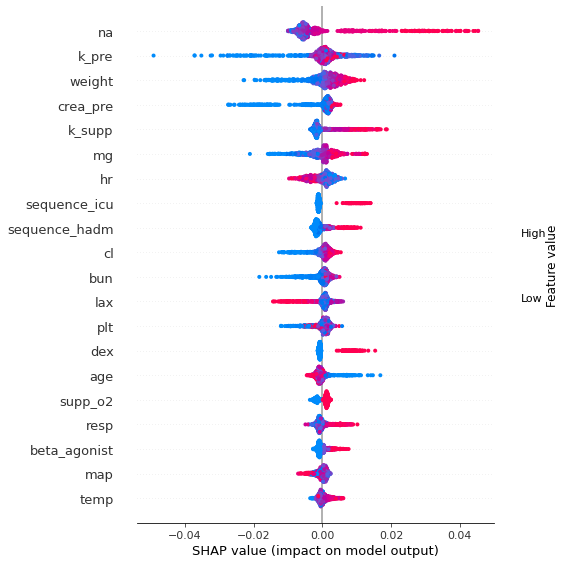

In [ ]:
shap.summary_plot(shap_values['Y0']['T0_1'])
plt.show()

# (A) Continuous outcomes 

## 1. Time: 0-48 

### 1.1 Min outcome serum potassium 

*The* confidence interval includes zero ==> the treatment effect might not be statistically significant 

In [385]:
W_columns = ['sequence_icu','sequence_hadm', 'diff_intime_admittime_day', 'male', 'age', 'weight', 'admission_type_emergency', 'adm_med', 'adm_surg', 'careunit_MICU/SICU', 'careunit_CVICU', 'careunit_TSICU', 'careunit_CCU', 
                    'bun', 'cl', 'crea_pre', 'glu', 'mg', 'k_pre', 'na', 'plt', 'urine', 'o2sat', 'resp', 'hr', 'map', 'temp','antiplatelet','beta_agonist', 'beta_blocker', 'cort', 'dex',
                     'furosemide', 'h2_antagonist', 'heparinoid', 'ins', 'k_supp', 'lax', 'nsaid','vaso_ind', 'coag', 'copd', 'depress', 'dm', 'hypothy', 'liver', 'htn', 'valve', 'mech_vent_invasive','supp_o2']

In [386]:
len(W_columns)

50

In [387]:
XTY = pd.read_csv("/content/XTY.csv")
XTY_train = pd.read_csv("/content/XTY_train.csv")
XTY_test = pd.read_csv("/content/XTY_test.csv")

#(1.2) Build a model
Y_train = XTY_train["0_48_min_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
#W_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [388]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=123)
forestdrl.fit(Y_train, T_train, X=X_train,cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
lb, ub = forestdrl.effect_interval(X_test, alpha=0.1)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.023       0.046 0.503  0.615        -0.053           0.1
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.021          -0.007           0.059
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.051         -0.056          0.108
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


#### ATE by feature

In [390]:
#ATE by feature 
ATE_by_feature = []
inference_results = []


for i in range(X_train.shape[1]):
    # Create the current feature (T) and confounders (W) matrices
    X_train_T = X_train[:, i].reshape(-1, 1)
    X_train_W = np.delete(X_train, i, axis=1)
    X_test_T = X_test[:, i].reshape(-1, 1)
    X_test_W = np.delete(X_test, i, axis=1)
    
    # Fit the ForestDRLearner using the current feature and confounders
    forestdrl.fit(Y_train, T_train, X=X_train_T#, W=X_train_W
                  )
    
    # Calculate the ATE for the current feature
    ATE = forestdrl.ate(X_test_T)
    
    # Store the ATE value
    ATE_by_feature.append(ATE)

    # Calculate p-value for the ATE
    ATE_inf = forestdrl.ate_inference(X_test_T)

    # Store the p-value
    inference_results.append(ATE_inf)

ATE_by_feature = np.array(ATE_by_feature)

In [393]:
ATE_by_feature_10 = ATE_by_feature[0:10]
print(ATE_by_feature)

[0.07871008 0.06588855 0.06711938 0.05850099 0.057098   0.06485233
 0.06116625 0.05983359 0.05918303 0.03945226 0.02687843 0.05893018
 0.06254669 0.04898787 0.05597822 0.05733605 0.04457572 0.03894605
 0.01807604 0.06487519 0.06744929 0.05765375 0.05279349 0.06779145
 0.04765059 0.06054514 0.05450671 0.06346223 0.05608526 0.05409461
 0.0620373  0.06033032 0.05439177 0.05787908 0.06237116 0.04184905
 0.05921424 0.05273822 0.05720403 0.06105684 0.05907399 0.0621613
 0.0636899  0.0681014  0.06157048 0.05965916 0.0569421  0.06232965
 0.06068262 0.06515652]


In [392]:
print(inference_results[0])

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.079       0.022 3.661    0.0         0.037         0.121
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.033          -0.043           0.089
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.039         -0.045          0.125
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [394]:
W_columns_10 = W_columns[0:10]
print(W_columns_10)

['sequence_icu', 'sequence_hadm', 'diff_intime_admittime_day', 'male', 'age', 'weight', 'admission_type_emergency', 'adm_med', 'adm_surg', 'careunit_MICU/SICU']


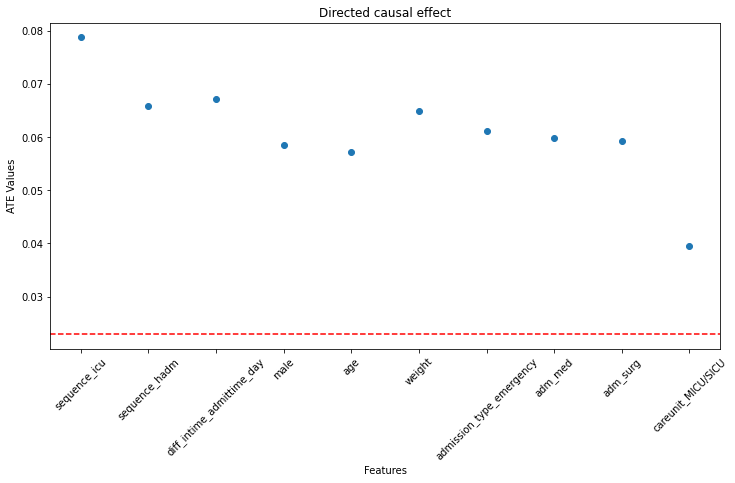

In [395]:
plt.figure(figsize=(12, 6))
plt.plot(W_columns_10, ATE_by_feature_10, 'o')
plt.xlabel("Features")
plt.ylabel("ATE Values")
plt.title("Directed causal effect")
plt.xticks(rotation=45)
plt.axhline(y=0.023, linestyle='--', color='red')  # Add a dashed horizontal line
plt.show()

#### Performance visualization 

In [229]:
print(forestdrl_te)

[0.03544136 0.03105724 0.01560737 ... 0.01005958 0.04512881 0.04364424]


In [233]:
W_columns = ['sequence_icu', 'sequence_hadm', 'diff_intime_admittime_day', 'male', 'age', 'weight', 'admission_type_emergency', 'adm_med', 'adm_surg', 'careunit_MICU/SICU', 'careunit_CVICU', 'careunit_TSICU', 'careunit_CCU', 
                    'bun', 'cl', 'crea_pre', 'glu', 'mg', 'k_pre', 'na', 'plt', 'urine', 'o2sat', 'resp', 'hr', 'map', 'temp','antiplatelet','beta_agonist', 'beta_blocker', 'cort', 'dex',
                     'furosemide', 'h2_antagonist', 'heparinoid', 'ins', 'k_supp', 'lax', 'nsaid','vaso_ind', 'coag', 'copd', 'depress', 'dm', 'hypothy', 'liver', 'htn', 'valve', 'mech_vent_invasive','supp_o2']

In [253]:
print(W_columns[43])

dm


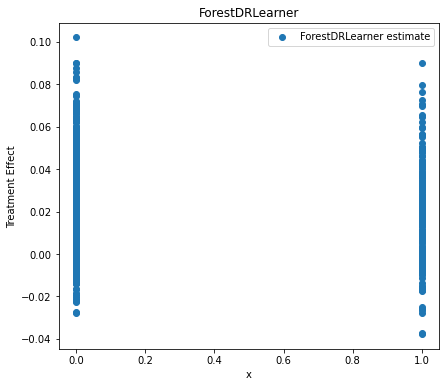

In [259]:
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.title("ForestDRLearner")
plt.scatter(X_test[:, 43], forestdrl_te, label='ForestDRLearner estimate')
#plt.fill_between(X_test[:, 21], lb, ub, alpha=.4)
plt.ylabel("Treatment Effect")
plt.xlabel("x")
plt.legend()

#### Refutation 

In [ ]:
#Refute with dowhy 
est = forestdrl.dowhy

In [ ]:
est.fit(Y_train, T_train, X=X_train_T, W=X_train_W, cache_values=True)

In [ ]:
print(est.summary())

Model to find the causal effect of treatment ['T0'] on outcome ['Y0']


In [ ]:
est.effect_inference(X_test).summary_frame()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
X,,,,,,
0,0.124,0.080,1.554,0.120,-0.032,0.281
1,-0.014,0.079,-0.183,0.855,-0.170,0.141
2,0.095,0.128,0.739,0.460,-0.156,0.346
3,0.124,0.080,1.554,0.120,-0.032,0.281
4,0.143,0.091,1.568,0.117,-0.036,0.322
...,...,...,...,...,...,...
1006,0.041,0.078,0.530,0.596,-0.111,0.193
1007,0.002,0.090,0.025,0.980,-0.174,0.178
1008,0.124,0.080,1.554,0.120,-0.032,0.281


In [ ]:
ref_res = est.refute_estimate(method_name="random_common_cause")
print(ref_res)

Refute: Add a random common cause
Estimated effect:0.015119024468306621
New effect:0.016532625451584276
p value:0.14



In [ ]:
ref_res2 = est.refute_estimate(method_name="data_subset_refuter",
                                    subset_fraction=0.8, random_state=123)
print(ref_res2)

Refute: Use a subset of data
Estimated effect:0.015119024468306621
New effect:0.01999975601615424
p value:0.0



In [ ]:
ref_res3 = est.refute_estimate(method_name="dummy_outcome_refuter", random_state=123)
print(ref_res3)

In [ ]:
print(ref_res3[0])

Refute: Use a Dummy Outcome
Estimated effect:0
New effect:0.00047397706236283033
p value:0.49





*  **Random common cause**: The estimation method should not change its estimate after an independent random variable was added as common cause 
*   **Data subset validation**: The estimated effect should not change significantly when the given sataset is replaced with a randomly selected subset
*  **Dummy outcome**: The effect should go to zero when the true outcome variable is replaced with an independent variable 





In [ ]:
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

#### Generic Boostrap Inference

In [ ]:
forestdrl.effect_inference(X_test[:5], T0=0, T1=1).summary_frame()

,point_estimate,stderr,zstat,pvalue,ci_lower,ci_upper
X,,,,,,
0,0.048,0.046,1.043,0.297,-0.042,0.137
1,0.028,0.049,0.580,0.562,-0.067,0.124
2,0.008,0.042,0.186,0.853,-0.074,0.090
3,0.016,0.036,0.433,0.665,-0.055,0.086
4,0.046,0.064,0.718,0.473,-0.079,0.171


In [ ]:
forestdrl.ate_inference(X_test)

#### Interpret the behavior with a single tree 

In [118]:
#Interpret the outcome 
intrp = SingleTreeCateInterpreter(include_model_uncertainty=False, max_depth=3, min_samples_leaf=10)

In [121]:
# We interpret the CATE model's behavior based on the features used for heterogeneity
intrp.interpret(forestdrl, X_test)
#Render the tree
intrp.render(out_file ="tree_0_48_min_k",feature_names=W_columns, rotate=True)
# Plot the tree
intrp.plot(fontsize=8, feature_names=W_columns, rounded = True)

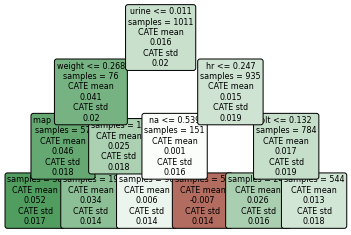

In [120]:
plt.show()
display(plt.gcf())


#### Interpret with SHAP values

In [ ]:
#Source: https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d

In [ ]:
shap_values = forestdrl.shap_values(X_test)

100%|===================| 1007/1011 [01:35<00:00]       

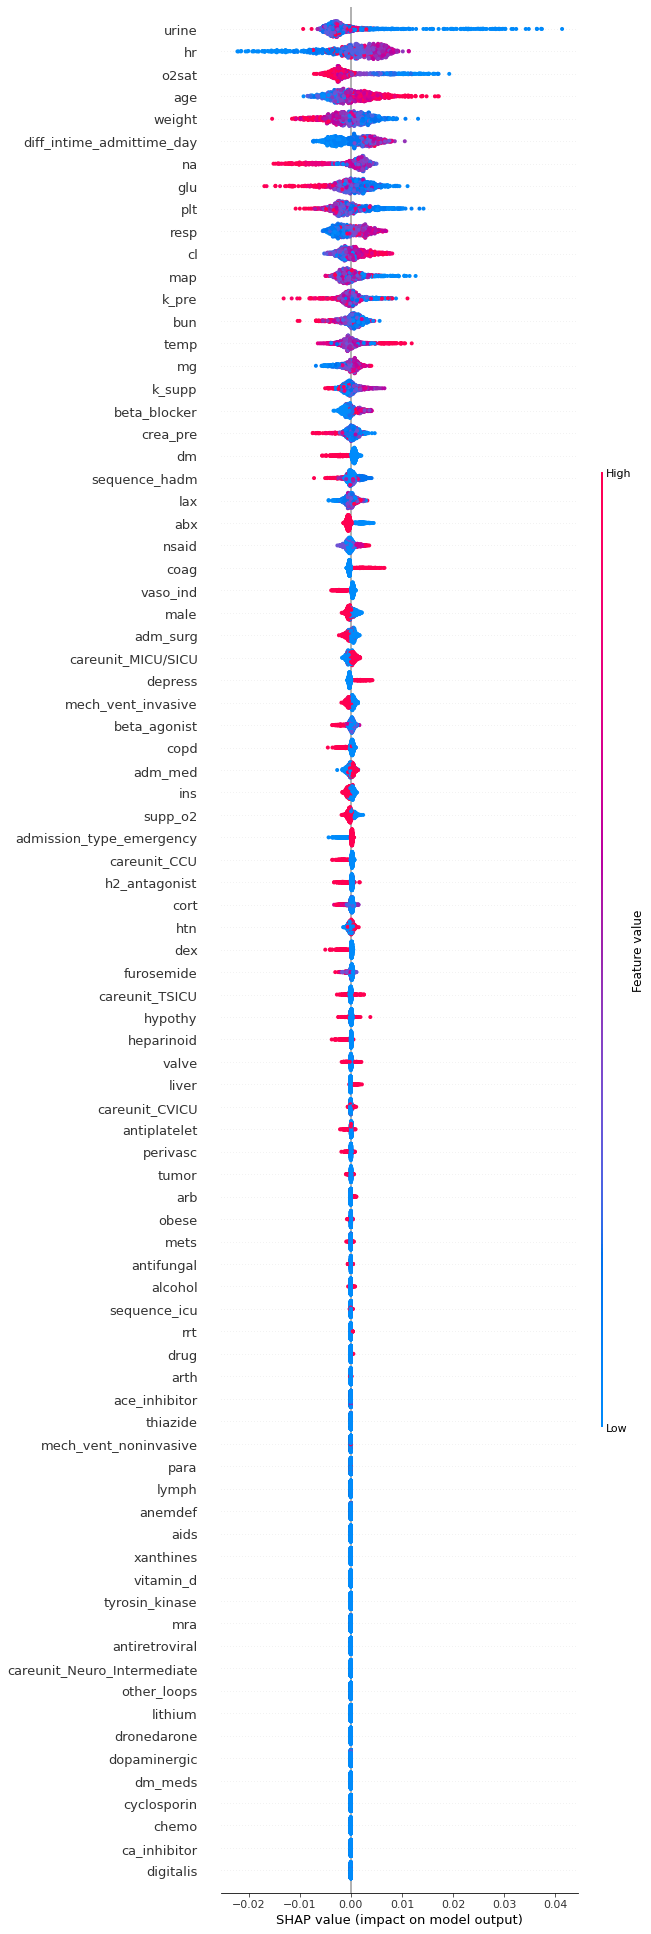

In [ ]:
shap.summary_plot(shap_values['Y0']['T0_1'], max_display=83)
plt.show()

*   The model output represents the treatment effect not the absolute value of the outcome 
*   The plot is made of all the dots in the train data 
*   Variables are ranked in descending order 
*  The SHAP value on the X-axis quantifies the contribution of the feature towards the treatment effect for this patient 
*   Example 1:  A SHAP value of 0.8 for glu means that the presence of this feature (a high glucose level) increases the treatment effect by 0.8 units for this specific patient. 
*  Example 2:  A SHAP value of -0.2 for glu means that the presence of this feature (a low glucose lebel) decreases the treatment effect by 0.2 units for this specific patient. 
*   *Original value*: Color shows whether that variable is high or low for that observation 
*   *Impact*: The horizontal location shows whether the effect of that value is associated with a higher or lower prediciton
*   *Respiratory rate*: A **low** respiratory rate has a positive impact on the treatment effect (Furosemide on minimum serum potassium). The low comes from the blue color and the positive impact is shown in the X-axis. 
*   *Glucose*: A **high** level of glucose has a positive effect on the treatment effect. 
*   *Heart rate*: A **low** heart rate has a positive effect on the treatment effect. 


In [ ]:
shap.plots.beeswarm(shap_values['Y0']['T0_1'])

In [ ]:
# Get the predictions and put them with the test data.
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(forestdrl.effect(X_output),2)

In [ ]:
# Randomly pick some observations
random_picks = np.arange(1,330,50) # Every 50 rows
S = X_output.iloc[random_picks]
print(S)

          sequence_icu  sequence_hadm  diff_intime_admittime_day       age  \
stay_id                                                                      
38432818      0.000000       0.014706                   0.098361  0.561644   
35235378      0.000000       0.014706                   0.065574  0.767123   
37646152      0.000000       0.000000                   0.073770  0.739726   
39833916      0.090909       0.044118                   0.032787  0.726027   
37142964      0.000000       0.000000                   0.008197  1.000000   
30237710      0.090909       0.088235                   0.016393  0.684932   
37324611      0.000000       0.014706                   0.040984  0.835616   

          male    weight  admission_type_emergency  adm_med  adm_surg  \
stay_id                                                                 
38432818   0.0  0.501022                       1.0      1.0       0.0   
35235378   0.0  0.067485                       0.0      0.0       1.0   
37646

In [280]:
X_train["age"].mean()

0.6586221387757314

In [ ]:
shap.force_plot(shap_values["Y0"]["T0_1"][3], matplotlib=True)

In [ ]:
plt.show()


 
*   **0.11** is the prediction of the treatment effect (effect of Furosemide on minimum potassium) for this patient 
*   **Base value**: The mean prediction for the treatment effect is -0.2729  
*   Red features:  Features that push the treatment effect higher 
*   Blue features: Features that push the treatment effect lower 
*   *Glucose*: The glucose level of this patient is 150 which is higher than the average value of 131.18, so a higher than average glucose level pushes the prediction higher (to the right). Glucose has a positive impact on treatment effect. 
*  *Creatinine*:  The creatinine of this patient is 1.7 which is higher than the average value of 1.3352, so a higher than average creatinine value drives the prediction to the right. Creatinine has a positive impact on the treatment effect. 
*   *Potassium pre*: The potassium level of this patient is 5.2 which is higher than the average of 4.19. It pushes the prediction higher (to the right), so pre potassium has a positive impact on the treatment effect. 
*   *Respiratory rate*: The respiratory rate of this patient is 13 which is lower than the average of 18.63. The respiratory rate pushes the prediction higher (to the right) so respiratory rate has a negative impact on the treatment effect. 
*  *Age*: The age of this patient is 91 which is higher than the average of 73.42, a higher than average age drives the prediction lower (to the left), so age as a negative impact on the treatment effect. 
*   *Heart rate*: The heart rate of this patient is 120 which is higher than the average of 89.14. Heart rate pushes the predicition lower (to the left) so heart rate as a 







In [ ]:
# Inverse transform the scaled data
#Glucose 
scaled_value  = 0.1138
min_value = 20 
max_value = 997.0
original_value = (scaled_value * (max_value - min_value)) + min_value
print("Original value:", original_value)

Original value: 131.18259999999998


In [ ]:
# Inverse transform the scaled data
#Creatinine 
scaled_value  = 0.0829
min_value = 0.1
max_value = 15 
original_value = (scaled_value * (max_value - min_value)) + min_value
print("Original value:", original_value)

Original value: 1.3352100000000002


In [ ]:
# Inverse transform the scaled data
#Potassium 
scaled_value  = 0.4615
min_value = 1.6 
max_value = 9.4 
original_value = (scaled_value * (max_value - min_value)) + min_value
print("Original value:", original_value)

Original value: 5.1997


In [ ]:
# Inverse transform the scaled data
#Respiratory rate 
scaled_value  = 0.3054
min_value = 0 
max_value = 61
original_value = (scaled_value * (max_value - min_value)) + min_value
print("Original value:", original_value)

Original value: 18.6294


In [327]:
# Inverse transform the scaled data
#Age
scaled_value  = 0.1461
min_value = 18 
max_value = 91
original_value = (scaled_value * (max_value - min_value)) + min_value
print("Original value:", original_value)

Original value: 28.665300000000002


In [ ]:
# Inverse transform the scaled data
#Heart rate 
scaled_value  = 0.3669
min_value = 33
max_value = 186 
original_value = (scaled_value * (max_value - min_value)) + min_value
print("Original value:", original_value)

Original value: 89.1357


In [ ]:
# Inverse transform the scaled data
#Laxatives  
scaled_value  = 0.1176
min_value = 0
max_value = 6 
original_value = (scaled_value * (max_value - min_value)) + min_value
print("Original value:", original_value)

Original value: 0.7056


In [ ]:
# Inverse transform the scaled data
#Weight
scaled_value  = 0.2186
min_value = 28.5
max_value = 273 
original_value = (scaled_value * (max_value - min_value)) + min_value
print("Original value:", original_value)

Original value: 81.9477


#### Sensitivity analysis

In [ ]:
import dowhy

In [ ]:
from econml.dowhy import DoWhyWrapper

In [ ]:
X = pd.read_csv("/content/X.csv")
T = pd.read_csv("/content/T.csv")
X_train = pd.read_csv("/content/X_train.csv")
T_train = pd.read_csv("/content/T_train.csv")
X_test = pd.read_csv("/content/X_test.csv")
T_test = pd.read_csv("/content/T_test.csv")
Y = pd.read_csv("/content/Y.csv")
Y_train = pd.read_csv("/content/Y_train.csv")
Y_test = pd.read_csv("/content/Y_test.csv")


#(1)Continuous outcome: Minimum serum potassium within 48 hours 
Y1B = Y.iloc[:, 1]
Y1B_train = Y_train.iloc[:, 1]
Y1B_test = Y_test.iloc[:, 1]

XT = pd.concat([X, pd.DataFrame(T, columns=['treated'])], axis=1)
XT_train = pd.concat([X_train, pd.DataFrame(T_train, columns=['treated'])], axis=1)
XT_test = pd.concat([X_test, pd.DataFrame(T_test, columns=['treated'])], axis=1)

XTY1B = pd.concat([XT, pd.DataFrame(Y1B, columns=["0_48_min_k"])], axis=1)
XTY1B_train = pd.concat([XT_train, pd.DataFrame(Y1B_train, columns=["0_48_min_k"])], axis=1)
XTY1B_test = pd.concat([XT_test, pd.DataFrame(Y1B_test, columns=["0_48_min_k"])], axis=1)

T.set_index("stay_id", inplace=True)
X_train.set_index("stay_id", inplace=True)
X_test.set_index("stay_id", inplace=True)
Y_train.set_index("stay_id", inplace=True)
Y_test.set_index("stay_id", inplace=True)
T_train.set_index("stay_id", inplace=True)
T_test.set_index("stay_id", inplace=True)

In [ ]:
treatment = "treated"
outcome = "0_48_min_k"
graph_file = "/content/graph_with_labels.dot"

In [ ]:
print(graph_file)

/content/graph_with_labels.dot


In [ ]:
forestdrl = forestdrl.dowhy

In [ ]:
forestdrl.fit(Y1B_train, T_train, X=X_train)

In [ ]:
forestdrl_res = forestdrl.refute_estimate(method_name="random_common_cause", num_simulations=5, random_seed=123)

AttributeError: ignored

####  Subgroup analysis 

In [284]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["age"]>0.6586]

In [289]:
print(XTY.shape)

(2595, 199)


In [290]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [287]:
#(1.2) Build a model
Y_train = XTY_train["0_48_min_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [291]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=123)
forestdrl.fit(Y_train, T_train, X=X_train,cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
lb, ub = forestdrl.effect_interval(X_test, alpha=0.1)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.026       0.043 0.606  0.545        -0.045         0.097
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.024          -0.008           0.066
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.049          -0.05          0.109
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 1.2 Max outcome serum potassium

In [18]:
W_columns = ['sequence_icu', 'sequence_hadm', 'diff_intime_admittime_day', 'male', 'age', 'weight', 'admission_type_emergency', 'adm_med', 'adm_surg', 'careunit_MICU/SICU', 'careunit_CVICU', 'careunit_TSICU', 'careunit_CCU', 
                    'bun', 'cl', 'crea_pre', 'glu', 'mg', 'k_pre', 'na', 'plt', 'urine', 'o2sat', 'resp', 'hr', 'map', 'temp','antiplatelet','beta_agonist', 'beta_blocker', 'cort', 'dex',
                     'furosemide', 'h2_antagonist', 'heparinoid', 'ins', 'k_supp', 'lax', 'nsaid','vaso_ind', 'coag', 'copd', 'depress', 'dm', 'hypothy', 'liver', 'htn', 'valve', 'mech_vent_invasive','supp_o2']

In [19]:
#Build a model
Y_train = XTY_train["0_48_max_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [20]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)


               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.042       0.054 0.785  0.432        -0.046         0.131
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.028           0.001           0.088
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
        0.06         -0.052          0.144
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 1.3 Mean outcome serum potassium 

In [21]:
W_columns = ['sequence_icu', 'sequence_hadm', 'diff_intime_admittime_day', 'male', 'age', 'weight', 'admission_type_emergency', 'adm_med', 'adm_surg', 'careunit_MICU/SICU', 'careunit_CVICU', 'careunit_TSICU', 'careunit_CCU', 
                    'bun', 'cl', 'crea_pre', 'glu', 'mg', 'k_pre', 'na', 'plt', 'urine', 'o2sat', 'resp', 'hr', 'map', 'temp','antiplatelet','beta_agonist', 'beta_blocker', 'cort', 'dex',
                     'furosemide', 'h2_antagonist', 'heparinoid', 'ins', 'k_supp', 'lax', 'nsaid','vaso_ind', 'coag', 'copd', 'depress', 'dm', 'hypothy', 'liver', 'htn', 'valve', 'mech_vent_invasive','supp_o2']

In [22]:
#Build a model
Y_train = XTY_train["0_48_mean_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [23]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.026       0.042 0.613   0.54        -0.043         0.095
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
     0.02          -0.006            0.06
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.047         -0.048          0.104
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 2. Time: 0-24 

### 2.1 Continous outcome: Min serum potassium (0,24)

In [24]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_24_min_k"].notnull()]

In [25]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [26]:
print(XTY_train.shape)

(3710, 151)


In [28]:
#Build a model
Y_train = XTY_train["0_24_min_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [29]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
      0.01       0.044 0.225  0.822        -0.062         0.082
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.017          -0.017           0.039
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.047         -0.066          0.087
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 2.3 Max outcome serum potassium

In [30]:
#Build a model
Y_train = XTY_train["0_24_max_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [31]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.041       0.046 0.896   0.37        -0.034         0.116
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.023           0.006           0.081
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.051         -0.039          0.127
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 2.3  Mean outcome serum potassium

In [32]:
#Build a model
Y_train = XTY_train["0_24_mean_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [33]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.023       0.042  0.54  0.589        -0.046         0.091
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.018          -0.005           0.054
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.045          -0.05          0.098
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 3. Time: 0-12 

### 3.1 Min outcome serum potassium 

In [34]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_12_min_k"].notnull()]

In [35]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [36]:
print(XTY_train.shape)

(2568, 151)


In [37]:
#Build a model
Y_train = XTY_train["0_12_min_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [38]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.029       0.046 0.629   0.53        -0.047         0.105
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.022           -0.01           0.063
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.051         -0.056          0.111
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 3.2 Max outcome serum potassium

In [39]:
#Build a model
Y_train = XTY_train["0_12_max_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [40]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.034       0.049 0.688  0.491        -0.047         0.115
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.023          -0.004           0.071
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.055         -0.053          0.124
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 3.3 Mean outcome serum potassium

In [41]:
#Build a model
Y_train = XTY_train["0_12_mean_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [42]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.031       0.046 0.678  0.498        -0.044         0.106
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.024           -0.01           0.065
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.051         -0.054          0.114
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 4. Time: 0-6

### 4.1 Min outcome serum potassium

In [44]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_6_min_k"].notnull()]

In [45]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [46]:
print(XTY_train.shape)

(1517, 151)


In [47]:
#Build a model
Y_train = XTY_train["0_6_min_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [48]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.078       0.061 1.271  0.204        -0.023         0.179
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
     0.05           0.021            0.17
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.079         -0.035          0.213
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 4.2 Mean outcome serum potassium


In [49]:
#Build a model
Y_train = XTY_train["0_6_mean_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [50]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.074       0.062 1.205  0.228        -0.027         0.175
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.047           0.025           0.158
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.077         -0.036          0.211
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 4.3 Max outcome serum potassium

In [52]:
#Build a model
Y_train = XTY_train["0_6_max_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [53]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
      0.07       0.061 1.149   0.25         -0.03          0.17
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.046           0.021           0.164
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.076          -0.04          0.201
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 5. Time: 0-3 

### 5.1 Min outcome serum potassium 


In [304]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_3_min_k"].notnull()]

In [305]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [306]:
#Build a model
Y_train = XTY_train["0_3_min_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [307]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
lb, ub = forestdrl.effect_interval(X_test, alpha=0.1)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.129       0.078  1.65  0.099           0.0         0.257
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.066           0.061            0.24
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.102         -0.006          0.286
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [166]:
te_df = pd.DataFrame(forestdrl_te, columns=["cate"])
print(te_df)

         cate
0    0.129178
1    0.115349
2    0.060067
3    0.104885
4    0.087879
..        ...
230  0.097621
231  0.149813
232  0.120823
233  0.097545
234  0.089634

[235 rows x 1 columns]


In [ ]:
lb_df = pd.DataFrame(lb, columns=['lb'])
ub_df = pd.DataFrame(ub, columns=['ub'])

In [165]:
print(lb_df)

           lb
0    0.030279
1   -0.006657
2   -0.083113
3   -0.032172
4    0.025378
..        ...
230 -0.022322
231  0.029072
232  0.036441
233 -0.042045
234 -0.026142

[235 rows x 1 columns]


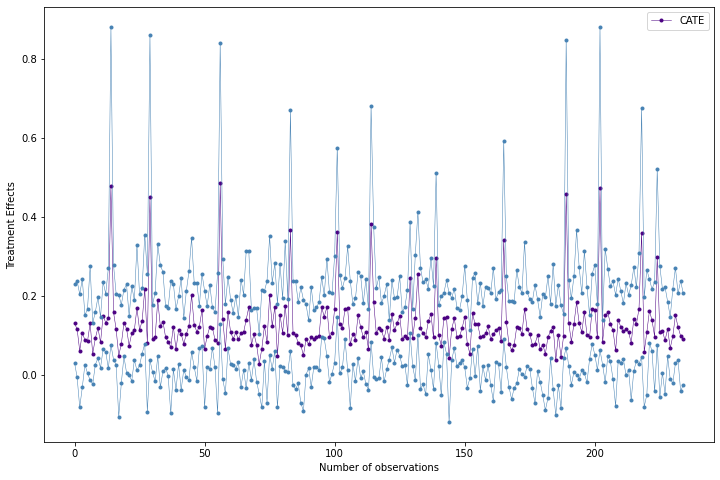

In [174]:
# set plot size
fig, ax = plt.subplots(figsize=(12, 8))
# plot lines for treatment effects and confidence intervals
ax.plot(te_df,
        marker='.', linestyle='-', linewidth=0.5, label='CATE', color='indigo')
ax.plot(lb,
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
ax.plot(ub,
        marker='.', linestyle='-', linewidth=0.5, color='steelblue')
# label axes and create legend
ax.set_ylabel('Treatment Effects')
ax.set_xlabel('Number of observations')
ax.legend()

In [181]:
forestdrl.feature_importances_

<bound method ForestModelFinalCateEstimatorDiscreteMixin.feature_importances_ of <econml.dr._drlearner.ForestDRLearner object at 0x7f39c911e1c0>>

In [138]:
#Interpret the outcome 
intrp = SingleTreeCateInterpreter(include_model_uncertainty=False, max_depth=3, min_samples_leaf=10)
# We interpret the CATE model's behavior based on the features used for heterogeneity
intrp.interpret(forestdrl, X_test)
#Render the tree
intrp.render(out_file ="tree_0_3_min_k",feature_names=W_columns, rotate=True)
# Plot the tree
intrp.plot(fontsize=8, feature_names=W_columns, rounded = True)

#### Subgroup analysis 

In [273]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_3_min_k"].notnull()]
XTY = XTY[XTY["abx"]==1]

In [277]:
print(XTY.shape)

(989, 199)


In [274]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [275]:
#Build a model
Y_train = XTY_train["0_3_min_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [276]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
lb, ub = forestdrl.effect_interval(X_test, alpha=0.1)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.102       0.075 1.357  0.175        -0.022         0.226
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.065           0.033           0.241
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.099         -0.031          0.292
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


#### ATE by feature 

In [369]:
#ATE by feature 
ATE_by_feature = []
inference_results = []


for i in range(X_train.shape[1]):
    # Create the current feature (T) and confounders (W) matrices
    X_train_T = X_train[:, i].reshape(-1, 1)
    X_train_W = np.delete(X_train, i, axis=1)
    X_test_T = X_test[:, i].reshape(-1, 1)
    X_test_W = np.delete(X_test, i, axis=1)
    
    # Fit the ForestDRLearner using the current feature and confounders
    forestdrl.fit(Y_train, T_train, X=X_train_T, W=X_train_W)
    
    # Calculate the ATE for the current feature
    ATE = forestdrl.ate(X_test_T)
    
    # Store the ATE value
    ATE_by_feature.append(ATE)

    # Calculate p-value for the ATE
    ATE_inf = forestdrl.ate_inference(X_test_T)

    # Store the p-value
    inference_results.append(ATE_inf)

ATE_by_feature = np.array(ATE_by_feature)

In [374]:
print(ATE_by_feature)

[0.13933487 0.14412312 0.14424731 0.14063543 0.14611012 0.13339465
 0.13687772 0.14035915 0.140421   0.13424108 0.13725228 0.13369955
 0.13323212 0.14625856 0.12607506 0.13794287 0.13085732 0.1326103
 0.10172017 0.13345108 0.14832538 0.12847518 0.1360057  0.13452159
 0.14399148 0.13738405 0.12454183 0.1382263  0.13510261 0.14120006
 0.13040649 0.12998125 0.13810974 0.1404829  0.14012127 0.13783963
 0.15710053 0.13831392 0.14837718 0.13614504 0.13587931 0.13902877
 0.13273711 0.14303772 0.14122936 0.13771035 0.13877876 0.1396378
 0.13859629 0.14057482]


In [376]:
print(inference_results[0])

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.139       0.053 2.652  0.008         0.036         0.242
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.033           0.042            0.15
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.062         -0.005          0.248
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [377]:
print(W_columns)

['sequence_icu', 'sequence_hadm', 'diff_intime_admittime_day', 'male', 'age', 'weight', 'admission_type_emergency', 'adm_med', 'adm_surg', 'careunit_MICU/SICU', 'careunit_CVICU', 'careunit_TSICU', 'careunit_CCU', 'bun', 'cl', 'crea_pre', 'glu', 'mg', 'k_pre', 'na', 'plt', 'urine', 'o2sat', 'resp', 'hr', 'map', 'temp', 'antiplatelet', 'beta_agonist', 'beta_blocker', 'cort', 'dex', 'furosemide', 'h2_antagonist', 'heparinoid', 'ins', 'k_supp', 'lax', 'nsaid', 'vaso_ind', 'coag', 'copd', 'depress', 'dm', 'hypothy', 'liver', 'htn', 'valve', 'mech_vent_invasive', 'supp_o2']


In [378]:
ATE_by_feature_10 = ATE_by_feature[0:10]
print(ATE_by_feature)

[0.13933487 0.14412312 0.14424731 0.14063543 0.14611012 0.13339465
 0.13687772 0.14035915 0.140421   0.13424108 0.13725228 0.13369955
 0.13323212 0.14625856 0.12607506 0.13794287 0.13085732 0.1326103
 0.10172017 0.13345108 0.14832538 0.12847518 0.1360057  0.13452159
 0.14399148 0.13738405 0.12454183 0.1382263  0.13510261 0.14120006
 0.13040649 0.12998125 0.13810974 0.1404829  0.14012127 0.13783963
 0.15710053 0.13831392 0.14837718 0.13614504 0.13587931 0.13902877
 0.13273711 0.14303772 0.14122936 0.13771035 0.13877876 0.1396378
 0.13859629 0.14057482]


In [379]:
W_columns_10 = W_columns[0:10]
print(W_columns_10)

['sequence_icu', 'sequence_hadm', 'diff_intime_admittime_day', 'male', 'age', 'weight', 'admission_type_emergency', 'adm_med', 'adm_surg', 'careunit_MICU/SICU']


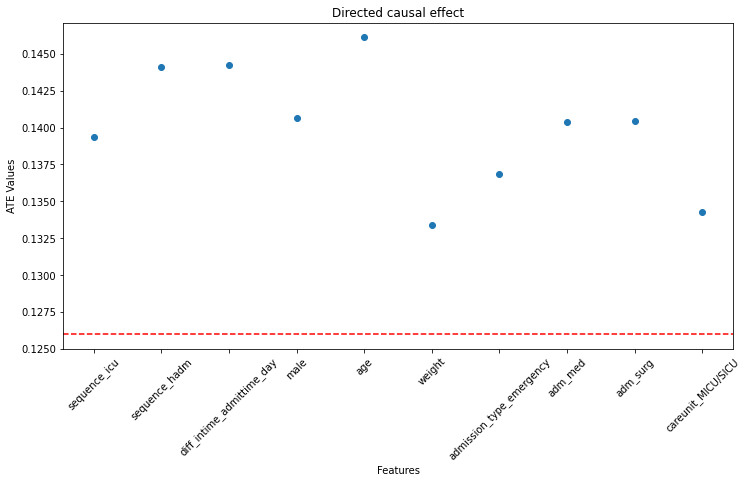

In [380]:
plt.figure(figsize=(12, 6))
plt.plot(W_columns_10, ATE_by_feature_10, 'o')
plt.xlabel("Features")
plt.ylabel("ATE Values")
plt.title("Directed causal effect")
plt.xticks(rotation=45)
plt.axhline(y=0.126, linestyle='--', color='red')  # Add a dashed horizontal line
plt.show()

In [326]:
original_ATE = (0.14611012 * (91 - 18))
print(original_ATE)

10.666038760000001


### 5.2 Mean outcome serum potassium 

In [26]:
#Build a model
Y_train = XTY_train["0_3_mean_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [27]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.128       0.079 1.634  0.102        -0.001         0.257
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.073           0.057           0.282
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.107          -0.01          0.291
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 5.3 Max outcome serum potassium 

In [28]:
#Build a model
Y_train = XTY_train["0_3_max_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [29]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
      0.13       0.079 1.652  0.099         0.001         0.259
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.073           0.062           0.297
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.107         -0.006            0.3
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 6. Time : 0-2

### 6.1 Min outcome serum potassium

In [72]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_2_min_k"].notnull()]

In [73]:
print(XTY.shape)

(920, 199)


In [74]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [75]:
#Build a model
Y_train = XTY_train["0_2_min_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [76]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.081       0.084 0.961  0.336        -0.057         0.218
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.036            0.03           0.146
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.091         -0.063          0.233
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 6.2  Max outcome serum potassium 

In [77]:
#Build a model
Y_train = XTY_train["0_2_max_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [78]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.073       0.084 0.874  0.382        -0.065         0.211
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.033           0.025           0.129
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
        0.09          -0.07          0.223
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 6.3  Mean outcome serum potassium 

In [79]:
#Build a model
Y_train = XTY_train["0_2_mean_k"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [80]:
#Estimate the effect 
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=cv, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.078       0.085 0.913  0.361        -0.062         0.218
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.034           0.031           0.138
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.092         -0.066          0.231
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


#(B) Creatinine as outcome

## Best nuisance models 

In [127]:
#Binary outcomes: Best estimators for propensity model and outcome model
model_y = LogisticRegression(C=0.01, random_state=123, n_jobs=1)
model_t = GradientBoostingClassifier(min_samples_leaf=10, n_estimators=50,
                           random_state=123)
model_yt = LogisticRegression(C=0.01, random_state=123, n_jobs=1)

In [128]:
#Continous outcomes: Best estimators for propensity model and outcome model
model_yb = GradientBoostingRegressor(min_samples_leaf=10, random_state=123)
model_tb = GradientBoostingClassifier(min_samples_leaf=10, n_estimators=50,
                           random_state=123)
model_ytb = GradientBoostingRegressor(min_samples_leaf=10, n_estimators=50,
                          random_state=123)

## (B) Binary outcome 

### 1.1 AKI (0,48) 

In [44]:
XTY = pd.read_csv("/content/XTY.csv")
XTY_train = pd.read_csv("/content/XTY_train.csv")
XTY_test = pd.read_csv("/content/XTY_test.csv")

#(1.2) Build a model
Y_train = XTY_train["0_48_AKI_stage_1"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
#W_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [45]:
print(XTY.shape)

(5053, 167)


In [118]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yt, model_propensity=model_t, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.003       0.021 -0.146  0.884        -0.038         0.032
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.015           -0.02           0.018
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.026         -0.038          0.034
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [161]:
LinearDR_learner = LinearDRLearner(model_regression=model_yt, model_propensity=model_t, random_state=123)
LinearDR_learner.fit(Y_train, T_train, X=X_train)
LinearDR_learner_cate = LinearDR_learner.effect(X_test)
LinearDR_learner_cate_inference = LinearDR_learner.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(LinearDR_learner_cate_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.002       0.007 0.306   0.76        -0.009         0.014
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.082          -0.114           0.144
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.082          -0.14          0.166
------------------------------------------


### 1.2 AKI (0,24) 

In [42]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_24_mean_outcome_crea"].notnull()]

In [43]:
print(XTY.shape)

(4633, 167)


In [163]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [164]:
print(XTY_train.shape)

(3706, 151)


In [165]:
#Build a model
Y_train = XTY_train["0_24_AKI_stage_1"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [166]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yt, model_propensity=model_t, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.005        0.02 -0.249  0.804        -0.038         0.028
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.013          -0.022           0.021
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.024         -0.035          0.035
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [167]:
LinearDR_learner = LinearDRLearner(model_regression=model_yt, model_propensity=model_t, random_state=123)
LinearDR_learner.fit(Y_train, T_train, X=X_train)
LinearDR_learner_cate = LinearDR_learner.effect(X_test)
LinearDR_learner_cate_inference = LinearDR_learner.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(LinearDR_learner_cate_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
    -0.001       0.007 -0.13  0.897        -0.013         0.011
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.062          -0.097           0.103
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.062         -0.123          0.136
------------------------------------------


### 1.3 AKI(0,12) 

In [40]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_12_mean_outcome_crea"].notnull()]

In [41]:
print(XTY.shape)

(3177, 167)


In [169]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [131]:
print(XTY_train.shape)

(2541, 151)


In [170]:
#Build a model
Y_train = XTY_train["0_12_AKI_stage_1"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [171]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yt, model_propensity=model_t, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.007       0.023 -0.315  0.753        -0.044          0.03
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.019          -0.031           0.032
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.029         -0.044          0.037
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [172]:
LinearDR_learner = LinearDRLearner(model_regression=model_yt, model_propensity=model_t, random_state=123)
LinearDR_learner.fit(Y_train, T_train, X=X_train)
LinearDR_learner_cate = LinearDR_learner.effect(X_test)
LinearDR_learner_cate_inference = LinearDR_learner.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(LinearDR_learner_cate_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.006       0.008 -0.802  0.422        -0.019         0.006
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.093          -0.143           0.136
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.093         -0.177          0.182
------------------------------------------


### 1.4 AKI (0,6) 

In [38]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_6_mean_outcome_crea"].notnull()]

In [39]:
print(XTY.shape)

(1845, 167)


In [174]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [175]:
print(XTY_train.shape)

(1476, 151)


In [137]:
#Build a model
Y_train = XTY_train["0_6_AKI_stage_1"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [138]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yt, model_propensity=model_t, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.004       0.027 -0.157  0.875        -0.048          0.04
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.015          -0.023           0.018
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.031         -0.043          0.041
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [176]:
LinearDR_learner = LinearDRLearner(model_regression=model_yt, model_propensity=model_t, random_state=123)
LinearDR_learner.fit(Y_train, T_train, X=X_train)
LinearDR_learner_cate = LinearDR_learner.effect(X_test)
LinearDR_learner_cate_inference = LinearDR_learner.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(LinearDR_learner_cate_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.006       0.008 -0.802  0.422        -0.019         0.006
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.093          -0.143           0.136
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.093         -0.177          0.182
------------------------------------------


### 1.5 AKi (0,3) 

In [33]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_3_mean_outcome_crea"].notnull()]

In [34]:
print(XTY.shape)

(1138, 167)


In [35]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [36]:
#Build a model
Y_train = XTY_train["0_3_AKI_stage_1"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [37]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_yt, model_propensity=model_t, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.025       0.029 -0.854  0.393        -0.073         0.023
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.012          -0.047          -0.009
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.032         -0.081          0.018
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


# (B) Continuous outcome 

## 1. Time: 0-48 

### 1.1 Mean serum creatinine 

In [ ]:
 '0_48_min_k', '0_48_hour_min_k', '0_48_hypokalemia', '0_48_severe_hypokalemia', '0_48_max_k', '0_48_hour_max_k', '0_48_hyperkalemia', '0_48_mean_k', '0_24_min_k', '0_24_hour_min_k', '0_24_hypokalemia', '0_24_severe_hypokalemia', '0_24_max_k', '0_24_hour_max_k', '0_24_hyperkalemia', '0_24_mean_k', '0_12_min_k', '0_12_hour_min_k', '0_12_hypokalemia', '0_12_severe_hypokalemia', '0_12_max_k', '0_12_hour_max_k', '0_12_hyperkalemia', '0_12_mean_k', '0_6_min_k', '0_6_hour_min_k', '0_6_hypokalemia', '0_6_severe_hypokalemia', '0_6_max_k', '0_6_hour_max_k', '0_6_hyperkalemia', '0_6_mean_k', '0_48_mean_outcome_crea', '0_48_max_outcome_crea', '0_48_hour_max_crea', '0_48_min_outcome_crea', '0_48_hour_min_crea', '0_48_max_diff_crea', '0_48_AKI_stage_1', '0_48_min_diff_crea', '0_24_mean_outcome_crea', '0_24_max_outcome_crea', '0_24_hour_max_crea', '0_24_min_outcome_crea', '0_24_hour_min_crea', '0_24_max_diff_crea', '0_24_AKI_stage_1', '0_24_min_diff_crea', '0_12_mean_outcome_crea', '0_12_max_outcome_crea', '0_12_hour_max_crea', '0_12_min_outcome_crea', '0_12_hour_min_crea', '0_12_max_diff_crea', '0_12_AKI_stage_1', '0_12_min_diff_crea', '0_6_mean_outcome_crea', '0_6_max_outcome_crea', '0_6_hour_max_crea', '0_6_min_outcome_crea', '0_6_hour_min_crea', '0_6_max_diff_crea', '0_6_AKI_stage_1', '0_6_min_diff_crea', 'sequence_icu', 'sequence_hadm', 'diff_intime_admittime_day', 'age', 'male', 'weight', 'admission_type_emergency', 'adm_med', 'adm_surg', 'careunit_MICU/SICU', 'careunit_CVICU', 'careunit_TSICU', 'careunit_CCU', 'careunit_Neuro_Intermediate', 'bun', 'cl', 'crea_pre', 'glu', 'mg', 'k_pre', 'na', 'plt', 'urine', 'o2sat', 'resp', 'hr', 'map', 'temp', 'ace_inhibitor', 'abx', 'antifungal', 'antiplatelet', 'antiretroviral', 'arb', 'beta_agonist', 'beta_blocker', 'ca_inhibitor', 'chemo', 'cort', 'cyclosporin', 'dex', 'digitalis', 'dm_meds', 'dopaminergic', 'dronedarone', 'furosemide', 'h2_antagonist', 'heparinoid', 'ins', 'k_supp', 'lax', 'lithium', 'nsaid', 'other_loops', 'mra', 'thiazide', 'tyrosin_kinase', 'vaso_ind', 'vitamin_d', 'xanthines', 'aids', 'alcohol', 'coag', 'copd', 'anemdef', 'depress', 'dm', 'drug', 'hypothy', 'liver', 'lymph', 'mets', 'obese', 'para', 'htn', 'perivasc', 'arth', 'tumor', 'valve', 'mech_vent_invasive', 'mech_vent_noninvasive', 'rrt', 'supp_o2']


In [126]:
XTY = pd.read_csv("/content/XTY.csv")
XTY_train = pd.read_csv("/content/XTY_train.csv")
XTY_test = pd.read_csv("/content/XTY_test.csv")

#(1.2) Build a model
Y_train = XTY_train["0_48_mean_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
#W_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [141]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.004       0.054 0.079  0.937        -0.084         0.093
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.034           -0.03           0.061
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.064         -0.062          0.093
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [179]:
forestdml = CausalForestDML(model_y=model_yb, model_t=model_tb, discrete_treatment=True ,random_state=seed)
forestdml.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdml_te = forestdml.effect(X_test)
forestdml_te_inference = forestdml.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdml_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.007       0.099 0.073  0.942        -0.155          0.17
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.072          -0.045            0.12
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.122          -0.12          0.185
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 1.2 Max serum creatinine 

In [129]:
XTY = pd.read_csv("/content/XTY.csv")
XTY_train = pd.read_csv("/content/XTY_train.csv")
XTY_test = pd.read_csv("/content/XTY_test.csv")

#(1.2) Build a model
Y_train = XTY_train["0_48_max_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
#W_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [130]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.023       0.058 0.396  0.692        -0.072         0.118
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.042          -0.017           0.115
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.071         -0.051          0.153
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [182]:
forestdml.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdml_te = forestdml.effect(X_test)
forestdml_te_inference = forestdml.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdml_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.027       0.111 0.244  0.807        -0.156          0.21
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.074          -0.049           0.182
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.134         -0.121          0.259
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [131]:
#Interpret the outcome 
intrp = SingleTreeCateInterpreter(include_model_uncertainty=False, max_depth=3, min_samples_leaf=10)
# We interpret the CATE model's behavior based on the features used for heterogeneity
intrp.interpret(forestdrl, X_test)
#Render the tree
intrp.render(out_file ="tree_0_48_max_crea",feature_names=W_columns, rotate=True)
# Plot the tree
intrp.plot(fontsize=8, feature_names=W_columns, rounded = True)

### 1.3  Min serum creatinine 

In [183]:
XTY = pd.read_csv("/content/XTY.csv")
XTY_train = pd.read_csv("/content/XTY_train.csv")
XTY_test = pd.read_csv("/content/XTY_test.csv")

#(1.2) Build a model
Y_train = XTY_train['0_48_min_outcome_crea'].to_numpy()
T_train = XTY_train["treated"].to_numpy()
#W_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [145]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.011       0.057 -0.201  0.841        -0.104         0.082
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.047          -0.104            0.03
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.073         -0.095          0.059
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [184]:
forestdml = CausalForestDML(model_y=model_yb, model_t=model_tb, discrete_treatment=True ,random_state=seed)
forestdml.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdml_te = forestdml.effect(X_test)
forestdml_te_inference = forestdml.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdml_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.011       0.114 -0.093  0.926        -0.198         0.177
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.101          -0.055           0.069
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.152         -0.136          0.141
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 1.4 Maximum increase serum creatinine

In [185]:
XTY = pd.read_csv("/content/XTY.csv")
XTY_train = pd.read_csv("/content/XTY_train.csv")
XTY_test = pd.read_csv("/content/XTY_test.csv")

#(1.2) Build a model
Y_train = XTY_train['0_48_max_diff_crea'].to_numpy()
T_train = XTY_train["treated"].to_numpy()
#W_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [147]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.013       0.089 0.142  0.887        -0.134         0.159
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.061          -0.036            0.17
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.108         -0.079          0.214
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [186]:
forestdml = CausalForestDML(model_y=model_yb, model_t=model_tb, discrete_treatment=True ,random_state=seed)
forestdml.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdml_te = forestdml.effect(X_test)
forestdml_te_inference = forestdml.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdml_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.022       0.146 0.149  0.881        -0.219         0.262
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.105          -0.066           0.255
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
        0.18         -0.163          0.355
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 1.5  Maximum decrease serum creatinine 

In [187]:
XTY = pd.read_csv("/content/XTY.csv")
XTY_train = pd.read_csv("/content/XTY_train.csv")
XTY_test = pd.read_csv("/content/XTY_test.csv")

#(1.2) Build a model
Y_train = XTY_train['0_48_min_diff_crea'].to_numpy()
T_train = XTY_train["treated"].to_numpy()
#W_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [149]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.024        0.08 -0.305   0.76        -0.156         0.107
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.067          -0.159           0.042
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.104         -0.133          0.074
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [188]:
forestdml = CausalForestDML(model_y=model_yb, model_t=model_tb, discrete_treatment=True ,random_state=seed)
forestdml.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdml_te = forestdml.effect(X_test)
forestdml_te_inference = forestdml.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdml_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.022       0.145 -0.152  0.879        -0.261         0.217
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.108           -0.08           0.091
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.181         -0.165          0.173
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 2. Time: 0-24

### 2.1 Mean serum creatinine 

In [189]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_24_mean_outcome_crea"].notnull()]

In [190]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [191]:
print(XTY_train.shape)

(3706, 151)


In [192]:
# Build a model
Y_train = XTY_train["0_24_mean_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [154]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.005       0.053 0.099  0.921        -0.082         0.092
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.027          -0.021           0.064
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
        0.06         -0.053          0.102
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


In [193]:
forestdml = CausalForestDML(model_y=model_yb, model_t=model_tb, discrete_treatment=True ,random_state=seed)
forestdml.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdml_te = forestdml.effect(X_test)
forestdml_te_inference = forestdml.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdml_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.021         0.1 0.207  0.836        -0.143         0.184
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.067          -0.031            0.14
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
        0.12         -0.098          0.208
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 2.2 Max serum creatinine 

In [155]:
# Build a model
Y_train = XTY_train["0_24_max_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [156]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.019       0.057 0.336  0.737        -0.075         0.113
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.041          -0.016           0.105
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
        0.07         -0.047          0.144
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 2.3 Min serum creatinine 

In [157]:
# Build a model
Y_train = XTY_train["0_24_min_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [158]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.004       0.056 -0.063   0.95        -0.095         0.088
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.024          -0.029           0.041
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.061         -0.066          0.083
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 2.4 Maximum increase serum creatinine 

In [194]:
# Build a model
Y_train = XTY_train["0_24_max_diff_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [195]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
      0.01       0.077  0.13  0.896        -0.116         0.136
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.047           -0.03           0.116
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
        0.09         -0.066          0.163
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 2.5 Maximum decrease serum creatinine

In [196]:
# Build a model
Y_train = XTY_train["0_24_min_diff_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [197]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
     -0.01       0.085 -0.113   0.91         -0.15          0.13
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.046          -0.059           0.065
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.097         -0.088          0.118
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 3. Time: 0-12 

### 3.1 Mean serum creatinine 

In [198]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_12_mean_outcome_crea"].notnull()]

In [199]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [200]:
print(XTY_train.shape)

(2541, 151)


In [201]:
# Build a model
Y_train = XTY_train["0_12_mean_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [202]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.007       0.064 0.107  0.915        -0.099         0.113
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.044          -0.022           0.094
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.078         -0.056          0.122
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 3.2 Max serum creatinine

In [203]:
# Build a model
Y_train = XTY_train["0_12_max_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [204]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.017        0.07 0.242  0.808        -0.099         0.133
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.064          -0.023           0.171
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.095         -0.059          0.188
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 3.3  Min serum creatinine 

In [205]:
# Build a model
Y_train = XTY_train["0_12_min_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [206]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.001       0.071 -0.008  0.994        -0.117         0.116
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.041          -0.045           0.059
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.082         -0.075          0.093
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 3.4 Maximum increase serum creatinine 

In [207]:
# Build a model
Y_train = XTY_train["0_12_max_diff_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [208]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
      -0.0       0.091 -0.005  0.996         -0.15          0.15
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.072          -0.039           0.163
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.116          -0.09          0.198
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 3.5  Maximun decrease serum creatinine

In [209]:
# Build a model
Y_train = XTY_train["0_12_min_diff_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [211]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.004       0.081 -0.053  0.957        -0.138         0.129
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.051           -0.04           0.096
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.096         -0.086          0.136
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 4. Time: 0-6

### 4.1 Mean serum creatinine 

In [212]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_6_mean_outcome_crea"].notnull()]

In [213]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [214]:
print(XTY_train.shape)

(1476, 151)


In [215]:
# Build a model
Y_train = XTY_train["0_6_mean_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [216]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.007       0.073 0.102  0.918        -0.113         0.128
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.061          -0.053           0.154
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.095         -0.088          0.175
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 4.2 Max serum creatinine 

In [217]:
# Build a model
Y_train = XTY_train["0_6_max_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [218]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.008       0.075 0.108  0.914        -0.115         0.131
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.052          -0.051           0.129
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.091         -0.093          0.168
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 4.3 Min serum creatinine 

In [219]:
# Build a model
Y_train = XTY_train["0_6_min_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [220]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.005        0.07 -0.072  0.942        -0.121         0.111
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
     0.05          -0.066           0.109
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.086         -0.108           0.13
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 4.4 Maximum increase serum creatinine

In [221]:
# Build a model
Y_train = XTY_train["0_6_max_diff_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [222]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.031       0.094 0.326  0.744        -0.124         0.185
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.116          -0.048           0.305
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.149         -0.088           0.36
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 4.5 Maximum decrease serum creatinine 

In [223]:
# Build a model
Y_train = XTY_train["0_6_min_diff_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [224]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate              
mean_point stderr_mean zstat pvalue ci_mean_lower ci_mean_upper
---------------------------------------------------------------
     0.022       0.095 0.235  0.814        -0.134         0.179
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.113          -0.058           0.296
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.147         -0.101          0.352
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


## 5. Time: 0-3

### 5.1 Mean serum creatinine 

In [46]:
#Only include patients that have an observation 
XTY = pd.read_csv("/content/XTY.csv")
XTY = XTY[XTY["0_3_mean_outcome_crea"].notnull()]

In [47]:
print(XTY.shape)

(1138, 167)


In [48]:
XTY_train, XTY_test = train_test_split(XTY, test_size=0.2, random_state=123)

In [49]:
# Build a model
Y_train = XTY_train["0_3_mean_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [50]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.001       0.101 -0.011  0.991        -0.167         0.165
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.052          -0.061           0.121
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.113         -0.131          0.191
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 5.2 Max serum creatinine 

In [51]:
# Build a model
Y_train = XTY_train["0_3_max_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [52]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.002         0.1 -0.018  0.985        -0.167         0.163
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.051          -0.059           0.112
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.112          -0.13          0.186
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 5.3 Min serum creatinine 

In [53]:
# Build a model
Y_train = XTY_train["0_3_min_outcome_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [54]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.005         0.1 -0.047  0.963        -0.168         0.159
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.049          -0.063           0.107
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.111         -0.131          0.183
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 5.4  Max increase serum creatinine 

In [55]:
# Build a model
Y_train = XTY_train["0_3_max_diff_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [56]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.053       0.128 -0.419  0.675        -0.263         0.156
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.044          -0.135           0.013
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.135         -0.238          0.124
------------------------------------------

Note: The stderr_mean is a conservative upper bound.


### 5.5 Max decrease serum creatinine 

In [57]:
# Build a model
Y_train = XTY_train["0_3_min_diff_crea"].to_numpy()
T_train = XTY_train["treated"].to_numpy()
X_train= XTY_train[W_columns].to_numpy().reshape(-1, 50)
X_test = XTY_test[W_columns].to_numpy().reshape(-1, 50)

In [58]:
cv = KFold(n_splits=3, shuffle=True, random_state=123)
forestdrl = ForestDRLearner(model_regression=model_ytb, model_propensity=model_tb, cv=3, min_samples_leaf=10, verbose=0, min_weight_fraction_leaf=.005, random_state=seed)
forestdrl.fit(Y_train, T_train, X=X_train, cache_values=True)
# Estimate treatment effects on test data
forestdrl_te = forestdrl.effect(X_test)
forestdrl_te_inference = forestdrl.effect_inference(X_test).population_summary(alpha=0.1, value=0, decimals=3, tol=0.001)
print(forestdrl_te_inference)

               Uncertainty of Mean Point Estimate               
mean_point stderr_mean zstat  pvalue ci_mean_lower ci_mean_upper
----------------------------------------------------------------
    -0.058       0.131 -0.441  0.659        -0.273         0.157
      Distribution of Point Estimate     
std_point pct_point_lower pct_point_upper
-----------------------------------------
    0.043          -0.142           0.002
     Total Variance of Point Estimate     
stderr_point ci_point_lower ci_point_upper
------------------------------------------
       0.137         -0.239          0.115
------------------------------------------

Note: The stderr_mean is a conservative upper bound.
